In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import CalculatedFieldSubroutines as cfs

from pandasgui import show

import os

import warnings

In [2]:
warnings.filterwarnings( 'ignore' )

In [3]:
def origin_dir():

    home_dir_list = os.listdir( '/home' )

    for dir in home_dir_list:

        if '_linux' in dir:

            path = f'/home/{dir}/Desktop/TDMprivate'

            if not os.path.exists( path ):

                raise Exception( 'TDMprivate folder does not exist. TDMprivate folder must exist on Desktop. Notify Ryan or ' +
                                 'Vincent if this message appears.' )

            else:

                return path

In [4]:
metadata_df = pd.read_csv( f'{ origin_dir() }/metadata/metadata.csv' )

In [5]:
red_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Red' ][ 'groupMetadataID' ].tolist()

green_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Green' ][ 'groupMetadataID' ].tolist() 

blue_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Blue' ][ 'groupMetadataID' ].tolist()

In [8]:
blue_route_gmID_list[ 0 ]

'06cbdbc0-db4d-11ee-a158-97f8443fd730'

In [6]:
chassis_file_string = '_apollo_canbus_chassis'

best_pose_file_string = '_apollo_sensor_gnss_best_pose'

#

reference_red_route_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ red_route_gmID_list[ 0 ] }/{ best_pose_file_string }/' + \
                                                f'{ red_route_gmID_list[ 0 ] + best_pose_file_string }.csv' )

#

red_route_combined_df_list = []

for gmID in red_route_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ chassis_file_string }/{ gmID + chassis_file_string }.csv' )

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_red_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    red_route_combined_df_list.append( current_gmID_combined_df )

#

reference_green_route_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ green_route_gmID_list[ 0 ] }/{ best_pose_file_string }/' + \
                                                  f'{ green_route_gmID_list[ 0 ] + best_pose_file_string }.csv' )

#

green_route_combined_df_list = []

for gmID in green_route_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ chassis_file_string }/{ gmID + chassis_file_string }.csv' )

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_green_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    green_route_combined_df_list.append( current_gmID_combined_df )

#

reference_blue_route_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ blue_route_gmID_list[ 0 ] }/{ best_pose_file_string }/' + \
                                                 f'{ blue_route_gmID_list[ 0 ] + best_pose_file_string }.csv' )

#

blue_route_combined_df_list = []

for gmID in blue_route_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ chassis_file_string }/{ gmID + chassis_file_string }.csv' )

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_blue_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    blue_route_combined_df_list.append( current_gmID_combined_df )

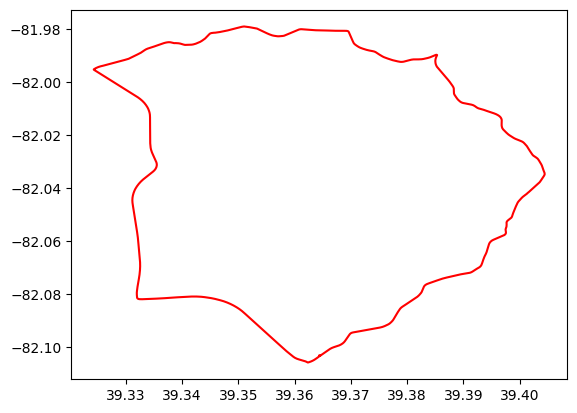

In [7]:
latitude_array = np.array( red_route_combined_df_list[ 0 ][ 'latitude' ] )

longitude_array = np.array( red_route_combined_df_list[ 0 ][ 'longitude' ] )

plt.plot( latitude_array, longitude_array, color = 'red', ls = '-' )

plt.show()

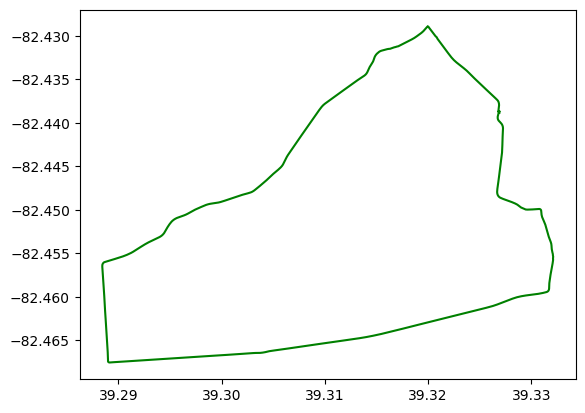

In [8]:
latitude_array = np.array( green_route_combined_df_list[ 0 ][ 'latitude' ] )

longitude_array = np.array( green_route_combined_df_list[ 0 ][ 'longitude' ] )

plt.plot( latitude_array, longitude_array, color = 'green', ls = '-' )

plt.show()

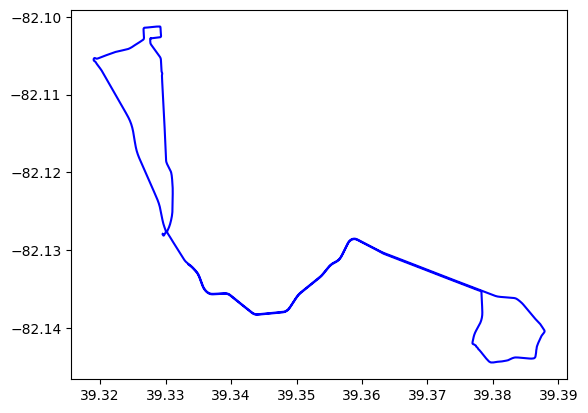

In [9]:
latitude_array = np.array( blue_route_combined_df_list[ 0 ][ 'latitude' ] )

longitude_array = np.array( blue_route_combined_df_list[ 0 ][ 'longitude' ] )

plt.plot( latitude_array, longitude_array, color = 'blue', ls = '-' )

plt.show()

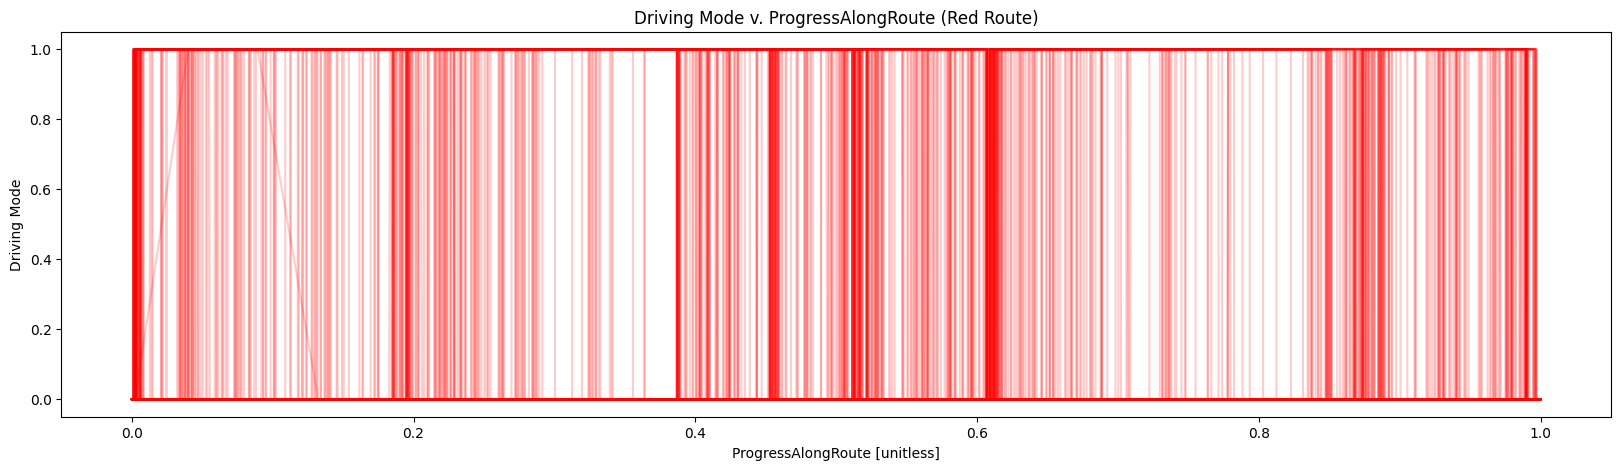

In [10]:
plt.figure( figsize = ( 20, 5 ) )

for df in red_route_combined_df_list:

    ProgressAlongRoute_array = np.array( df[ 'ProgressAlongRoute' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( ProgressAlongRoute_array, BinaryDrivingMode_array, color = 'red', alpha = 1 / 5 )

plt.xlabel( 'ProgressAlongRoute [unitless]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. ProgressAlongRoute (Red Route)' )

plt.show()

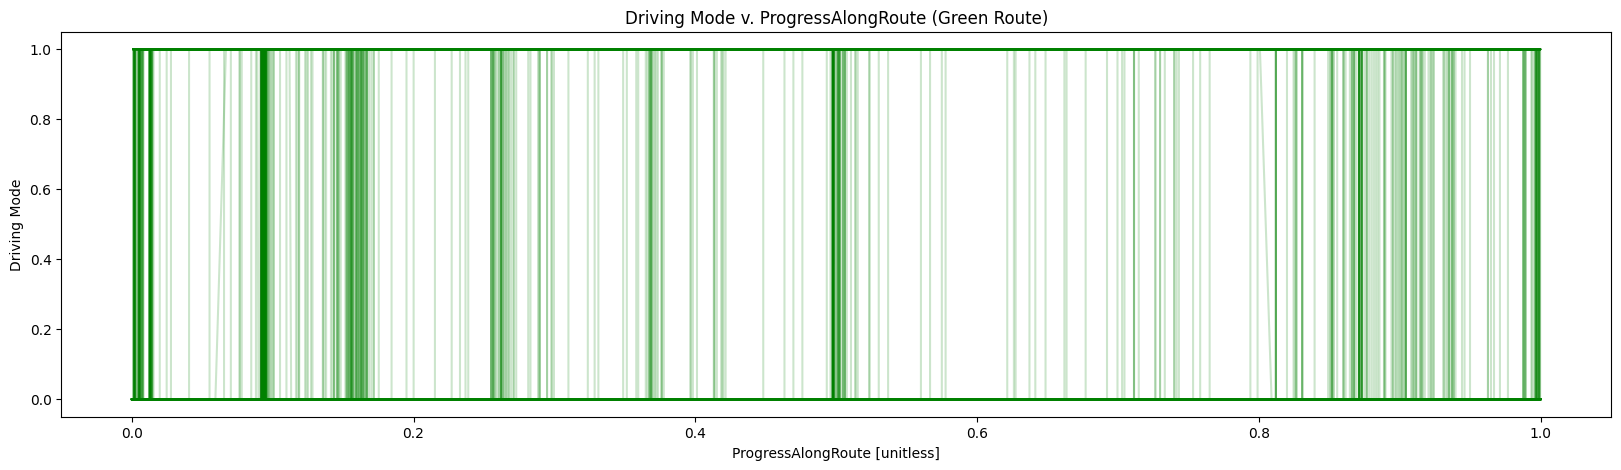

In [11]:
plt.figure( figsize = ( 20, 5 ) )

for df in green_route_combined_df_list:

    ProgressAlongRoute_array = np.array( df[ 'ProgressAlongRoute' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( ProgressAlongRoute_array, BinaryDrivingMode_array, color = 'green', alpha = 1 / 5 )

plt.xlabel( 'ProgressAlongRoute [unitless]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. ProgressAlongRoute (Green Route)' )

plt.show()

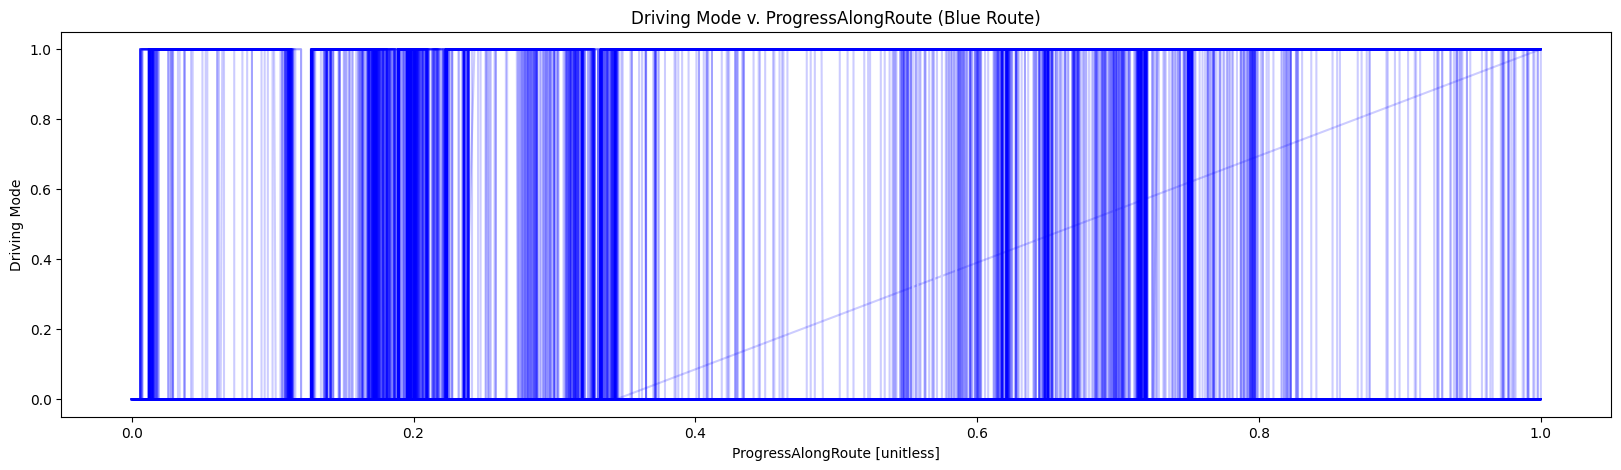

In [12]:
plt.figure( figsize = ( 20, 5 ) )

for df in blue_route_combined_df_list:

    ProgressAlongRoute_array = np.array( df[ 'ProgressAlongRoute' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( ProgressAlongRoute_array, BinaryDrivingMode_array, color = 'blue', alpha = 1 / 5 )

plt.xlabel( 'ProgressAlongRoute [unitless]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. ProgressAlongRoute (Blue Route)' )

plt.show()

In [5]:
metadata_red_route_df  = metadata_df[ metadata_df[ 'Route' ] == 'Red' ] 

metadata_green_route_df  = metadata_df[ metadata_df[ 'Route' ] == 'Green' ] 

metadata_blue_route_df  = metadata_df[ metadata_df[ 'Route' ] == 'Blue' ] 

In [6]:
metadata_red_route_van1_df = metadata_red_route_df[ metadata_red_route_df[ 'vehicleID' ] == 'Van1' ]

metadata_red_route_van2_df = metadata_red_route_df[ metadata_red_route_df[ 'vehicleID' ] == 'Van2' ]

#

metadata_green_route_van1_df = metadata_green_route_df[ metadata_green_route_df[ 'vehicleID' ] == 'Van1' ]

metadata_green_route_van2_df = metadata_green_route_df[ metadata_green_route_df[ 'vehicleID' ] == 'Van2' ]

#

metadata_blue_route_van1_df = metadata_blue_route_df[ metadata_blue_route_df[ 'vehicleID' ] == 'Van1' ]

metadata_blue_route_van2_df = metadata_blue_route_df[ metadata_blue_route_df[ 'vehicleID' ] == 'Van2' ]

In [7]:
red_route_van1_gmID_list = metadata_red_route_van1_df[ 'groupMetadataID' ].tolist()

red_route_van2_gmID_list = metadata_red_route_van2_df[ 'groupMetadataID' ].tolist()

#

green_route_van1_gmID_list = metadata_green_route_van1_df[ 'groupMetadataID' ].tolist()

green_route_van2_gmID_list = metadata_green_route_van2_df[ 'groupMetadataID' ].tolist()

#

blue_route_van1_gmID_list = metadata_blue_route_van1_df[ 'groupMetadataID' ].tolist()

blue_route_van2_gmID_list = metadata_blue_route_van2_df[ 'groupMetadataID' ].tolist()

In [19]:
chassis_file_string = '_apollo_canbus_chassis'

#

red_route_van1_chassis_df_list = []

for gmID in red_route_van1_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    red_route_van1_chassis_df_list.append( current_gmID_chassis_df )

red_route_van2_chassis_df_list = []

for gmID in red_route_van2_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    red_route_van2_chassis_df_list.append( current_gmID_chassis_df )

#

green_route_van1_chassis_df_list = []

for gmID in green_route_van1_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    green_route_van1_chassis_df_list.append( current_gmID_chassis_df )

green_route_van2_chassis_df_list = []

for gmID in green_route_van2_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    green_route_van2_chassis_df_list.append( current_gmID_chassis_df )

#

blue_route_van1_chassis_df_list = []

for gmID in blue_route_van1_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    blue_route_van1_chassis_df_list.append( current_gmID_chassis_df )

blue_route_van2_chassis_df_list = []

for gmID in blue_route_van2_gmID_list:

    current_gmID_chassis_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/_apollo_canbus_chassis/{ gmID + chassis_file_string }.csv' )

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    cfs.NormalizedTime( current_gmID_chassis_df )

    cfs.DeltaTime( current_gmID_chassis_df )

    cfs.Distance( current_gmID_chassis_df )

    blue_route_van2_chassis_df_list.append( current_gmID_chassis_df )

In [20]:
show( red_route_van2_chassis_df_list[ 0 ] )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


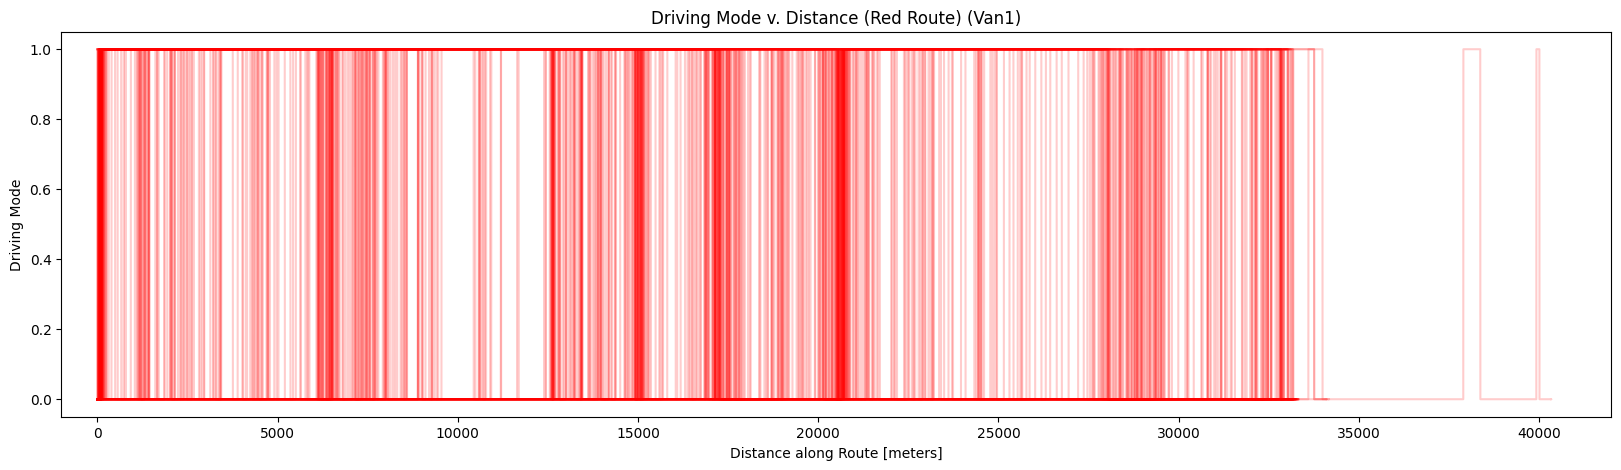

In [45]:
plt.figure( figsize = ( 20, 5 ) )

for df in red_route_van1_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'red', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Red Route) (Van1)' )

plt.xlim( -1000, 42000 )

plt.show()

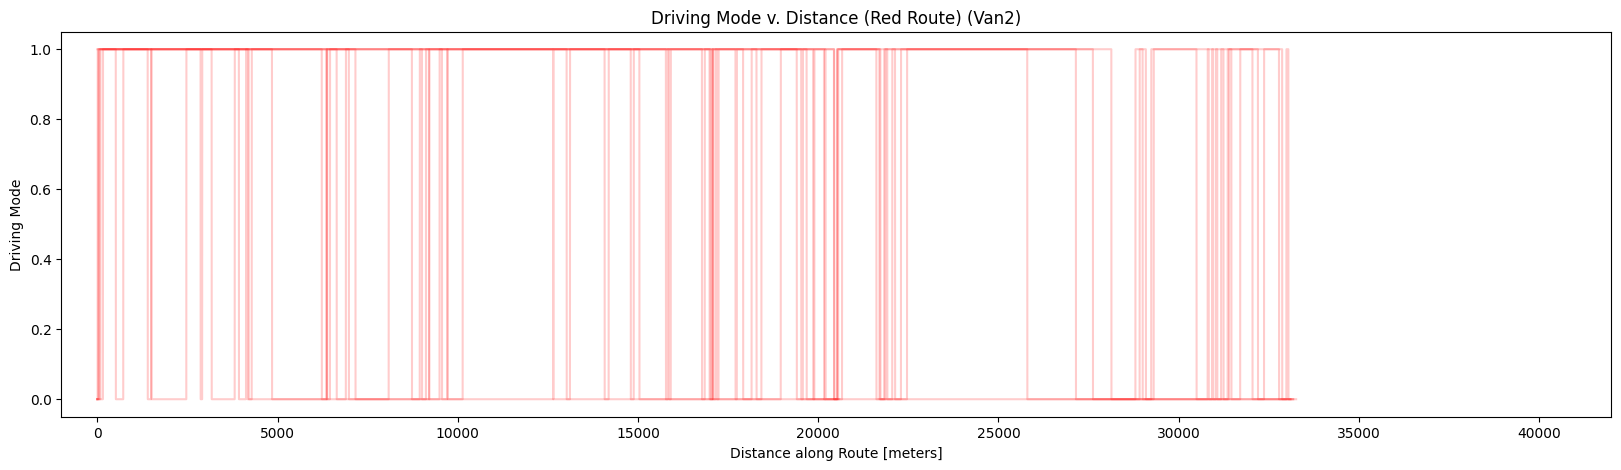

In [46]:
plt.figure( figsize = ( 20, 5 ) )

for df in red_route_van2_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'red', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Red Route) (Van2)' )

plt.xlim( -1000, 42000 )

plt.show()

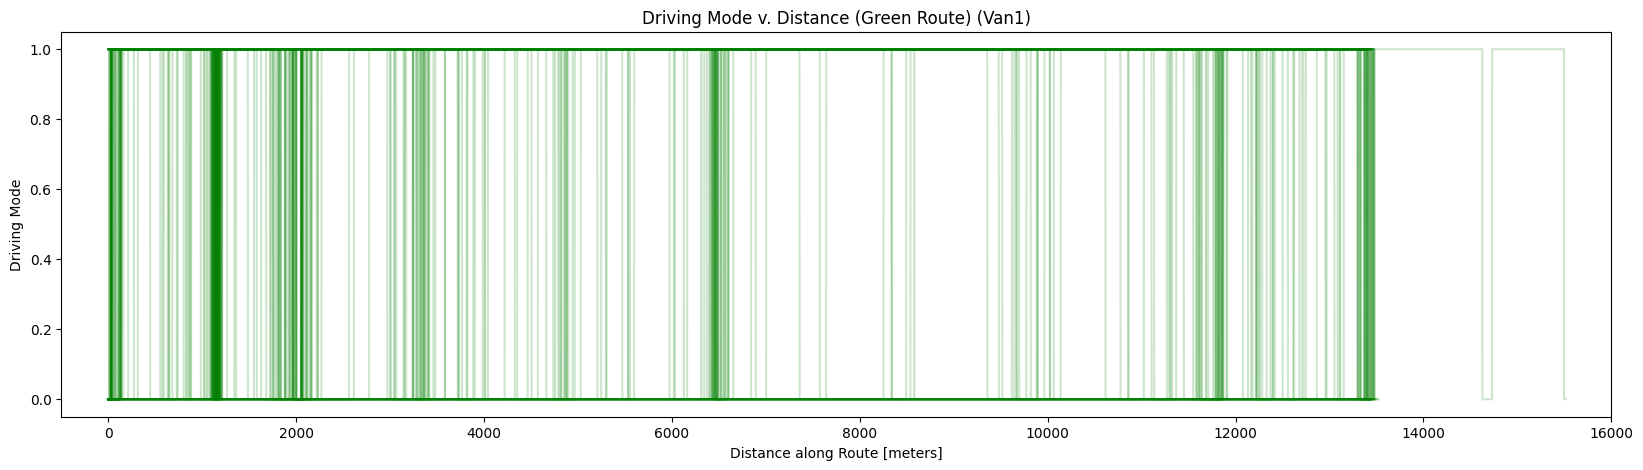

In [48]:
plt.figure( figsize = ( 20, 5 ) )

for df in green_route_van1_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'green', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Green Route) (Van1)' )

plt.xlim( -500, 16000 )

plt.show()

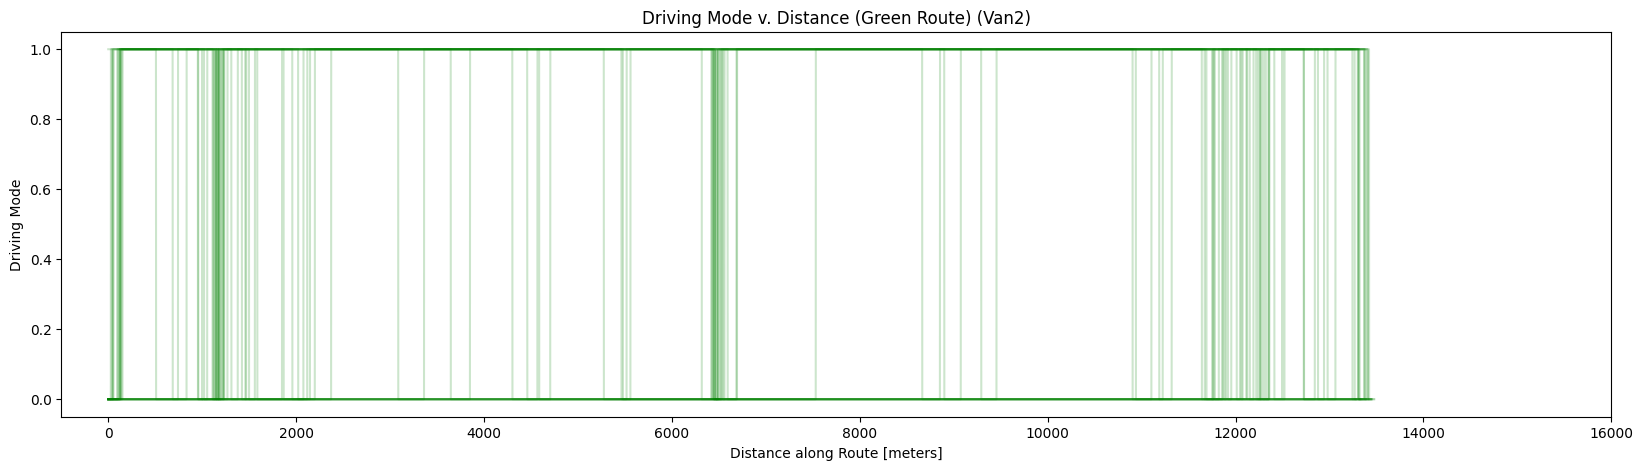

In [49]:
plt.figure( figsize = ( 20, 5 ) )

for df in green_route_van2_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'green', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Green Route) (Van2)' )

plt.xlim( -500, 16000 )

plt.show()

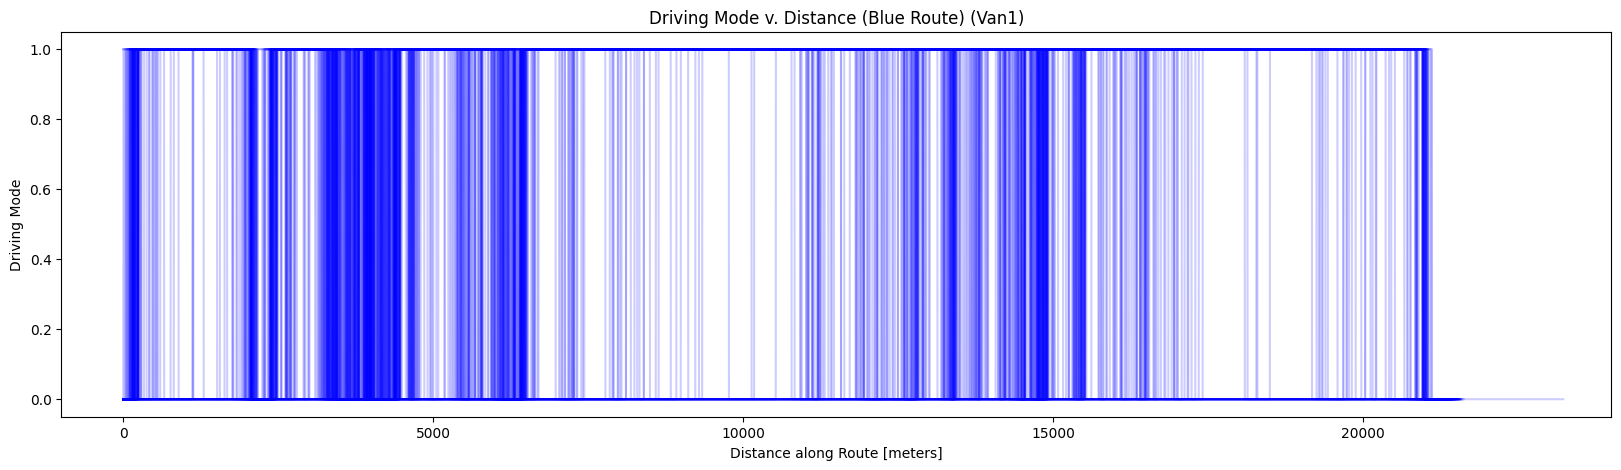

In [59]:
plt.figure( figsize = ( 20, 5 ) )

for df in blue_route_van1_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'blue', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Blue Route) (Van1)' )

plt.xlim( -1000, 24000 )

plt.show()

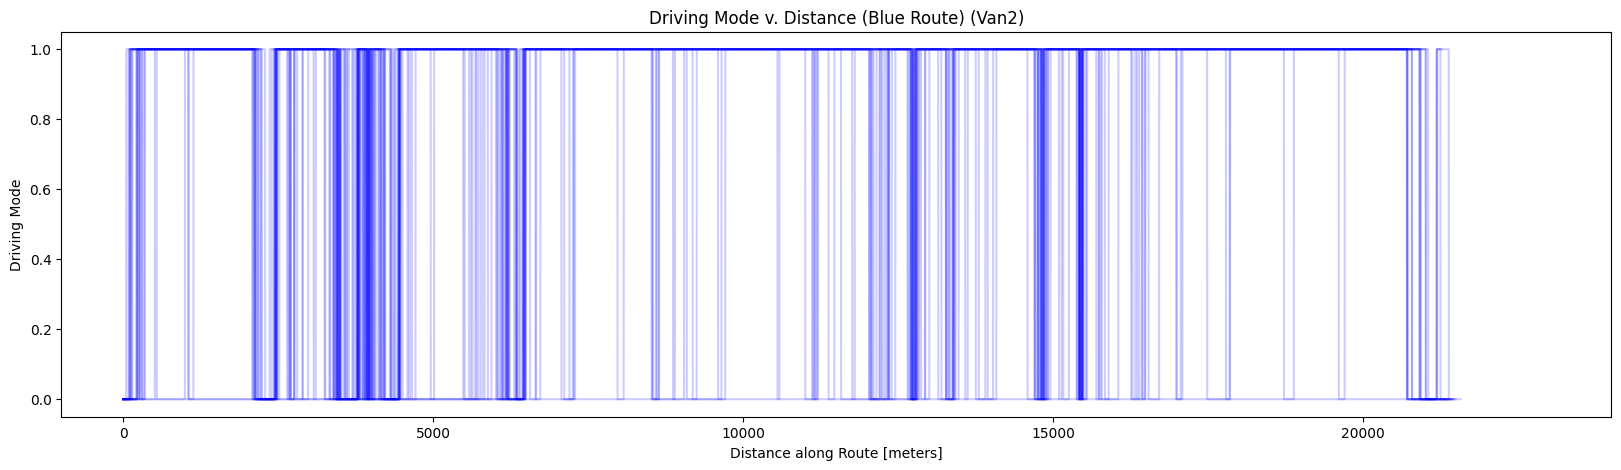

In [55]:
plt.figure( figsize = ( 20, 5 ) )

for df in blue_route_van2_chassis_df_list:

    NormalizedTime_array = np.array( df[ 'Distance' ] )

    BinaryDrivingMode_array = np.array( df[ 'BinaryDrivingMode' ] )

    plt.plot( NormalizedTime_array, BinaryDrivingMode_array, color = 'blue', alpha = 1 / 5 )

plt.xlabel( 'Distance along Route [meters]' )

plt.ylabel( 'Driving Mode' )

plt.title( 'Driving Mode v. Distance (Blue Route) (Van2)' )

plt.xlim( -1000, 24000 )

plt.show()